# **Explorar tabela curriculum**

In [1]:
import pandas as pd

# Definir caminho da tabela
caminho_curriculum = r"E:\Mestrado UFCG\Semestre 2024.2\Dados\Tabelas_0\curriculum.csv"

# Carregar a tabela
curriculum = pd.read_csv(caminho_curriculum, sep=';', encoding='utf-8')  # Ajuste 'sep' e 'encoding' conforme necessário

# Visualizar primeiras linhas
curriculum.head()

# Listar as colunas
print("Colunas da tabela 'curriculum':")
for coluna in curriculum.columns:
    print("-", coluna)


Colunas da tabela 'curriculum':
- CODIGO_CURSO
- CODIGO_CURRICULAR
- TERMO_NUMERO_MINIMO
- TERMO_NUMERO_MAXIMO
- NUMERO_MINIMO_CREDITO_INSCRITO
- NUMERO_MAXIMO_CREDITOS_INSCRITOS
- MINIMO_CREDITO_OBRIGATORIOS_NECESSARIO
- MINIMO_CREDITO_OPCIONAIS_NECESSARIOS
- MINIMO_CREDITOS_COMPLEMENTARES_NECESSARIOS
- MINIMO_ATIVIDADES_EXTENSAO_ACADEMICA


### Distribuição de Termos para Conclusão (Número Mínimo e Máximo)

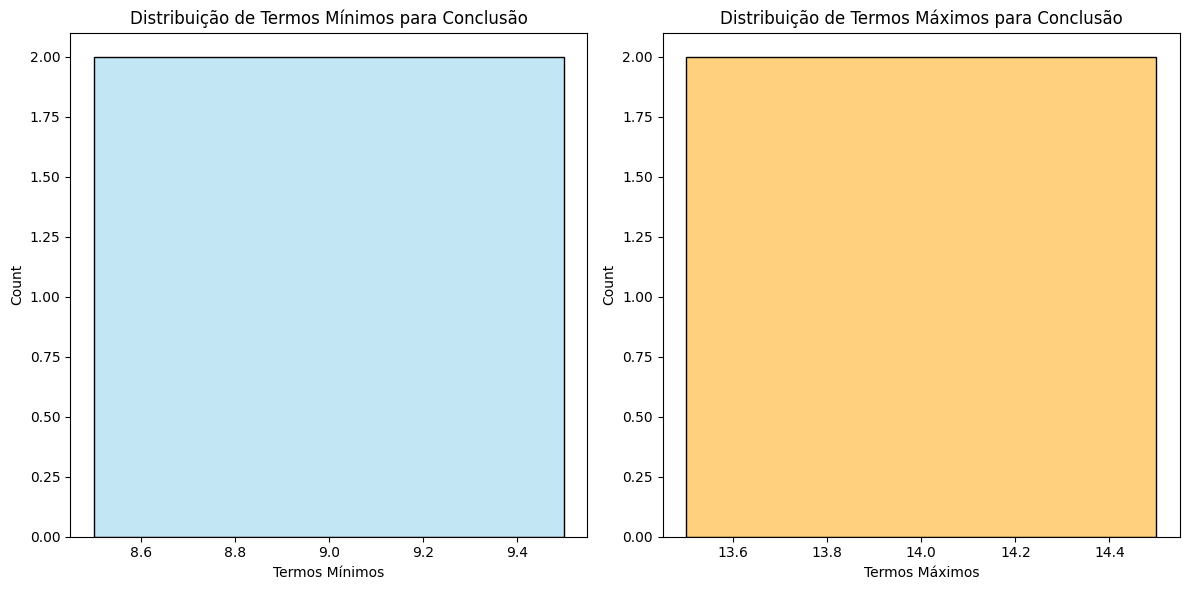

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico para ver a distribuição de termos de conclusão
plt.figure(figsize=(12, 6))

# Histograma do número mínimo de termos para formatura
plt.subplot(1, 2, 1)
sns.histplot(curriculum['TERMO_NUMERO_MINIMO'], kde=True, color='skyblue')
plt.title('Distribuição de Termos Mínimos para Conclusão')
plt.xlabel('Termos Mínimos')

# Histograma do número máximo de termos para formatura
plt.subplot(1, 2, 2)
sns.histplot(curriculum['TERMO_NUMERO_MAXIMO'], kde=True, color='orange')
plt.title('Distribuição de Termos Máximos para Conclusão')
plt.xlabel('Termos Máximos')

plt.tight_layout()
plt.show()

### Número de Créditos Inscritos (Mínimo e Máximo)

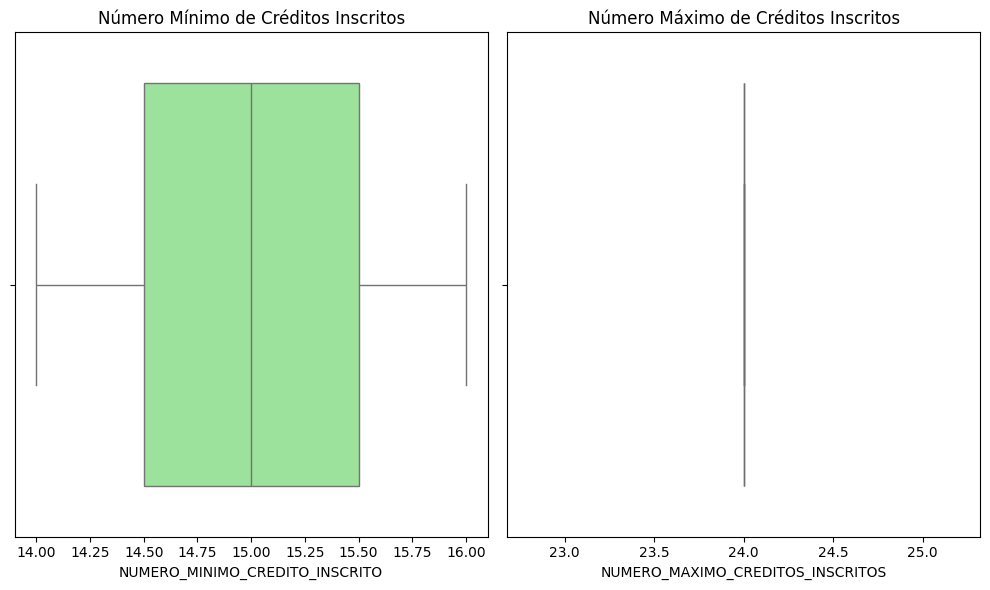

In [5]:
# Boxplot dos créditos mínimos e máximos inscritos
plt.figure(figsize=(10, 6))

# Boxplot do número mínimo de créditos
plt.subplot(1, 2, 1)
sns.boxplot(x=curriculum['NUMERO_MINIMO_CREDITO_INSCRITO'], color='lightgreen')
plt.title('Número Mínimo de Créditos Inscritos')

# Boxplot do número máximo de créditos
plt.subplot(1, 2, 2)
sns.boxplot(x=curriculum['NUMERO_MAXIMO_CREDITOS_INSCRITOS'], color='lightcoral')
plt.title('Número Máximo de Créditos Inscritos')

plt.tight_layout()
plt.show()


### Créditos Obrigatórios vs. Opcionais para Formatura

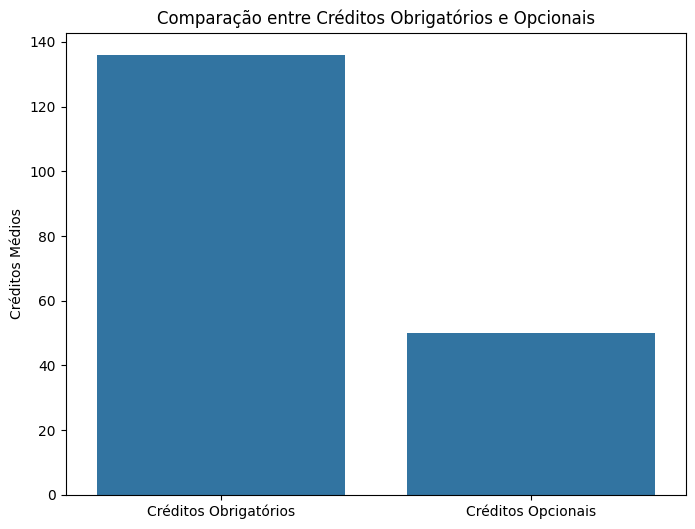

In [7]:
# Gráfico de barras para comparação entre créditos obrigatórios e opcionais
plt.figure(figsize=(8, 6))
sns.barplot(x=['Créditos Obrigatórios', 'Créditos Opcionais'],
            y=[curriculum['MINIMO_CREDITO_OBRIGATORIOS_NECESSARIO'].mean(), curriculum['MINIMO_CREDITO_OPCIONAIS_NECESSARIOS'].mean()])
plt.title('Comparação entre Créditos Obrigatórios e Opcionais')
plt.ylabel('Créditos Médios')
plt.show()

### Créditos Mínimos de Atividades Complementares


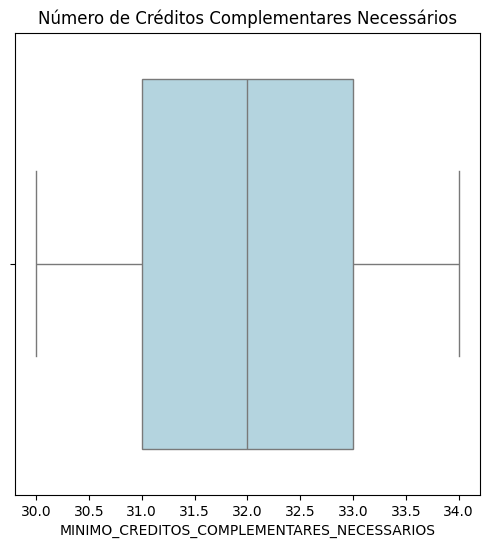

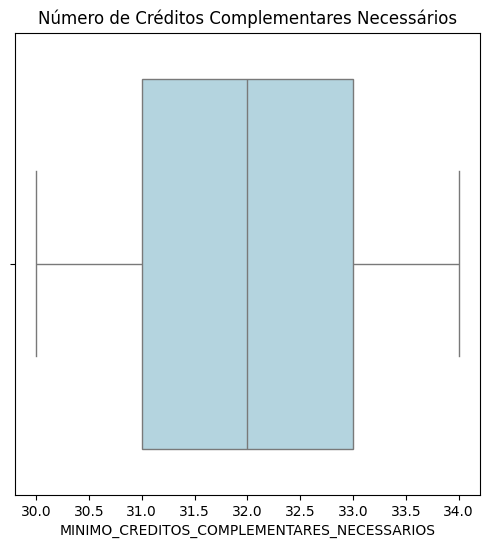

In [9]:
# Boxplot para o número de créditos complementares necessários
plt.figure(figsize=(6, 6))
sns.boxplot(x=curriculum['MINIMO_CREDITOS_COMPLEMENTARES_NECESSARIOS'], color='lightblue')
plt.title('Número de Créditos Complementares Necessários')
plt.show()# Boxplot para o número de créditos complementares necessários
plt.figure(figsize=(6, 6))
sns.boxplot(x=curriculum['MINIMO_CREDITOS_COMPLEMENTARES_NECESSARIOS'], color='lightblue')
plt.title('Número de Créditos Complementares Necessários')
plt.show()

### Comparação entre Cursos e Exigências de Créditos

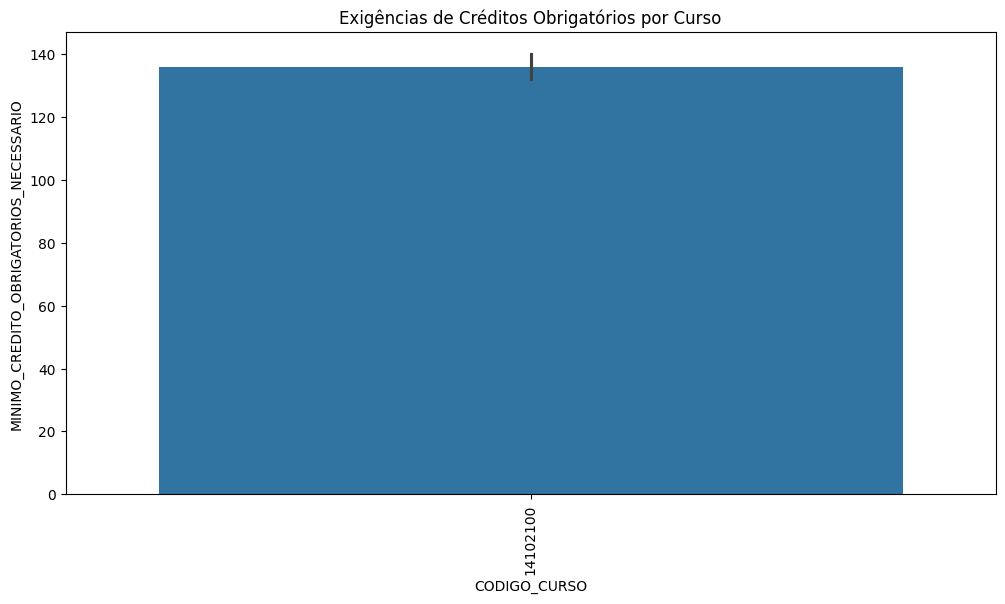

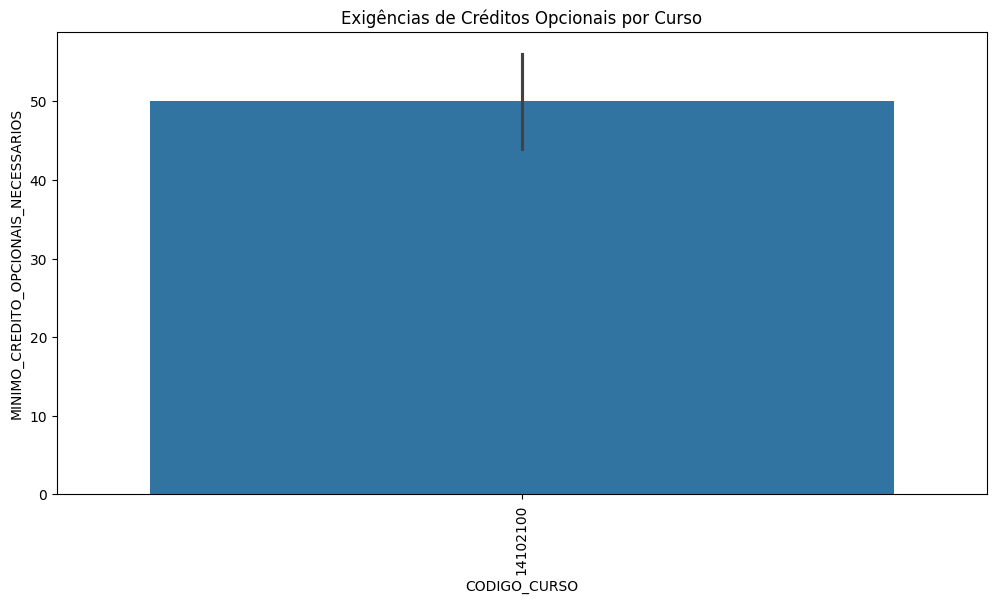

In [10]:
# Gráfico de barras para comparar cursos com relação aos créditos obrigatórios
plt.figure(figsize=(12, 6))
sns.barplot(x='CODIGO_CURSO', y='MINIMO_CREDITO_OBRIGATORIOS_NECESSARIO', data=curriculum)
plt.title('Exigências de Créditos Obrigatórios por Curso')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras para comparar cursos com relação aos créditos opcionais
plt.figure(figsize=(12, 6))
sns.barplot(x='CODIGO_CURSO', y='MINIMO_CREDITO_OPCIONAIS_NECESSARIOS', data=curriculum)
plt.title('Exigências de Créditos Opcionais por Curso')
plt.xticks(rotation=90)
plt.show()

### Correlação entre Exigências de Créditos e Termos

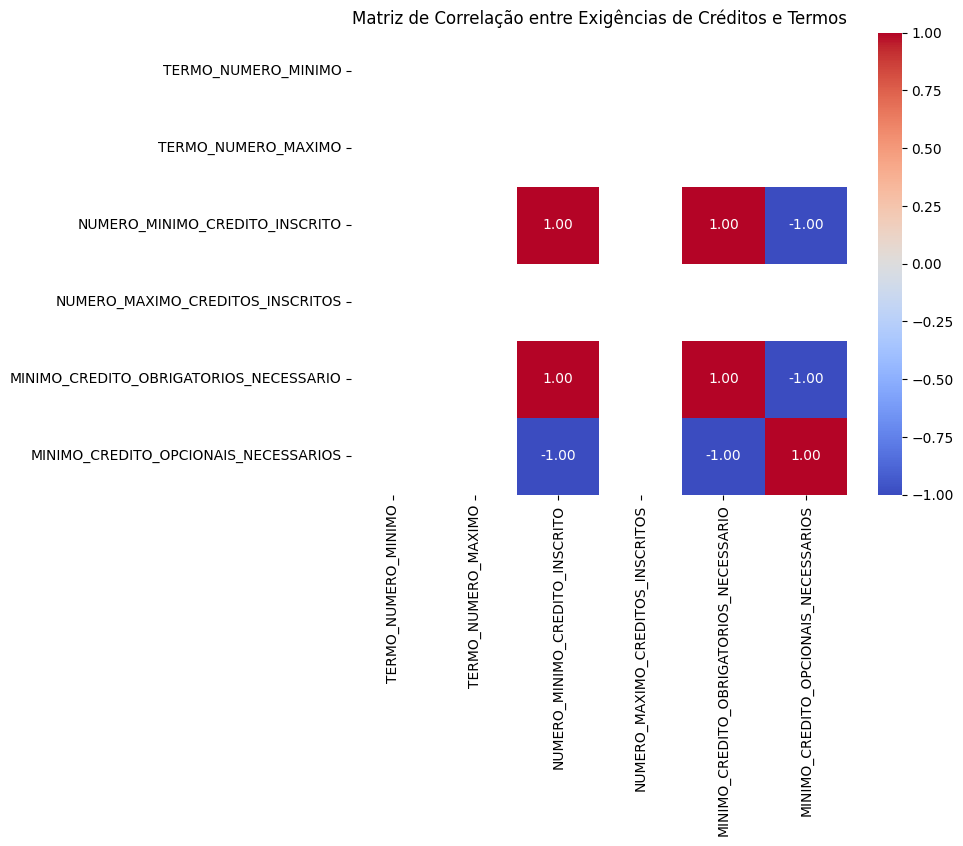

In [11]:
# Calcular a correlação entre as variáveis numéricas
correlacao = curriculum[['TERMO_NUMERO_MINIMO', 'TERMO_NUMERO_MAXIMO', 
                               'NUMERO_MINIMO_CREDITO_INSCRITO', 'NUMERO_MAXIMO_CREDITOS_INSCRITOS', 
                               'MINIMO_CREDITO_OBRIGATORIOS_NECESSARIO', 'MINIMO_CREDITO_OPCIONAIS_NECESSARIOS']].corr()

# Visualizar a correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Exigências de Créditos e Termos')
plt.show()


### Gráfico de Barras Empilhadas para Comparação entre Créditos Obrigatórios e Opcionais

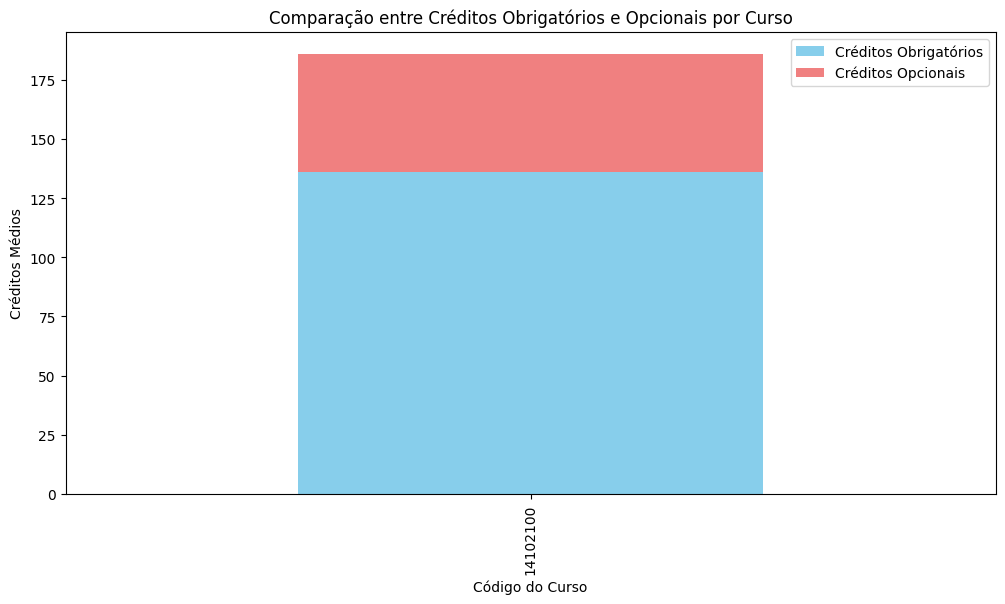

In [12]:
# Gráfico de barras empilhadas comparando créditos obrigatórios e opcionais
import pandas as pd

# Criar um DataFrame com os créditos obrigatórios e opcionais por curso
df_comparacao = curriculum.groupby('CODIGO_CURSO')[['MINIMO_CREDITO_OBRIGATORIOS_NECESSARIO', 'MINIMO_CREDITO_OPCIONAIS_NECESSARIOS']].mean()

# Plotando barras empilhadas
df_comparacao.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'lightcoral'])
plt.title('Comparação entre Créditos Obrigatórios e Opcionais por Curso')
plt.xlabel('Código do Curso')
plt.ylabel('Créditos Médios')
plt.xticks(rotation=90)
plt.legend(['Créditos Obrigatórios', 'Créditos Opcionais'])
plt.show()


### Gráfico de Barras Lado a Lado (Clustered) para Créditos Obrigatórios e Opcionais por Curso

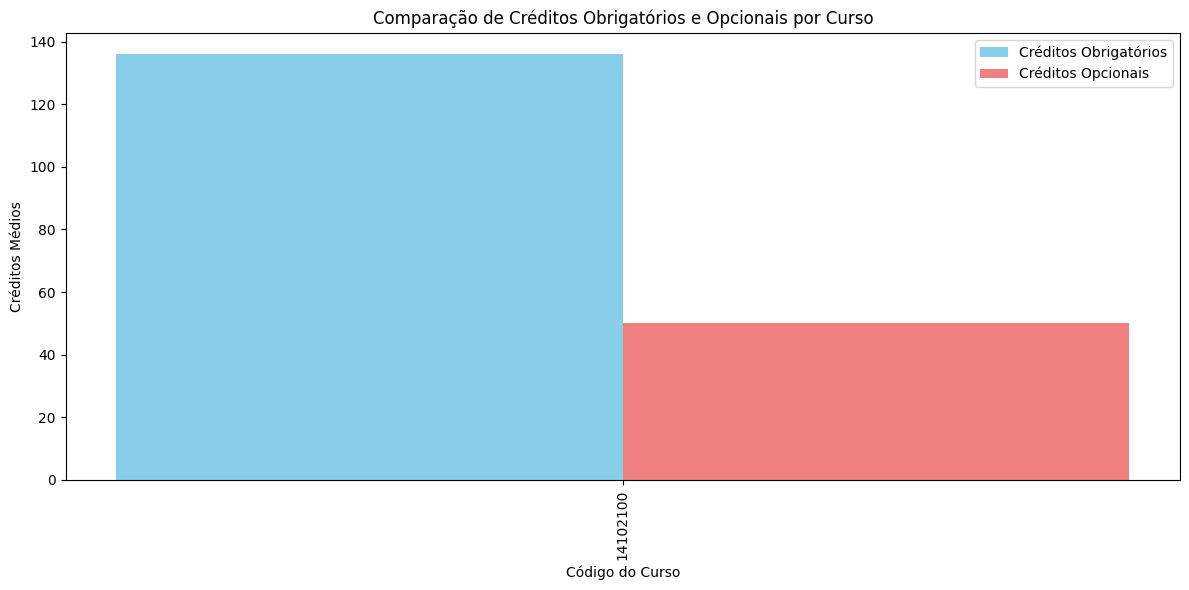

In [13]:
# Gráfico de barras lado a lado para créditos obrigatórios e opcionais por curso
import numpy as np

# Definir o número de cursos e a posição das barras
cursos = df_comparacao.index
creditos_obrigatorios = df_comparacao['MINIMO_CREDITO_OBRIGATORIOS_NECESSARIO']
creditos_opcionais = df_comparacao['MINIMO_CREDITO_OPCIONAIS_NECESSARIOS']

# Ajustar a posição das barras
x = np.arange(len(cursos))

# Plotando barras lado a lado
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
ax.bar(x - bar_width / 2, creditos_obrigatorios, bar_width, label='Créditos Obrigatórios', color='skyblue')
ax.bar(x + bar_width / 2, creditos_opcionais, bar_width, label='Créditos Opcionais', color='lightcoral')

# Adicionando título, rótulos e legendas
ax.set_title('Comparação de Créditos Obrigatórios e Opcionais por Curso')
ax.set_xlabel('Código do Curso')
ax.set_ylabel('Créditos Médios')
ax.set_xticks(x)
ax.set_xticklabels(cursos, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

### Gráfico de Barras Empilhadas para Créditos Mínimos de Atividades Complementares e Exigência de Termos

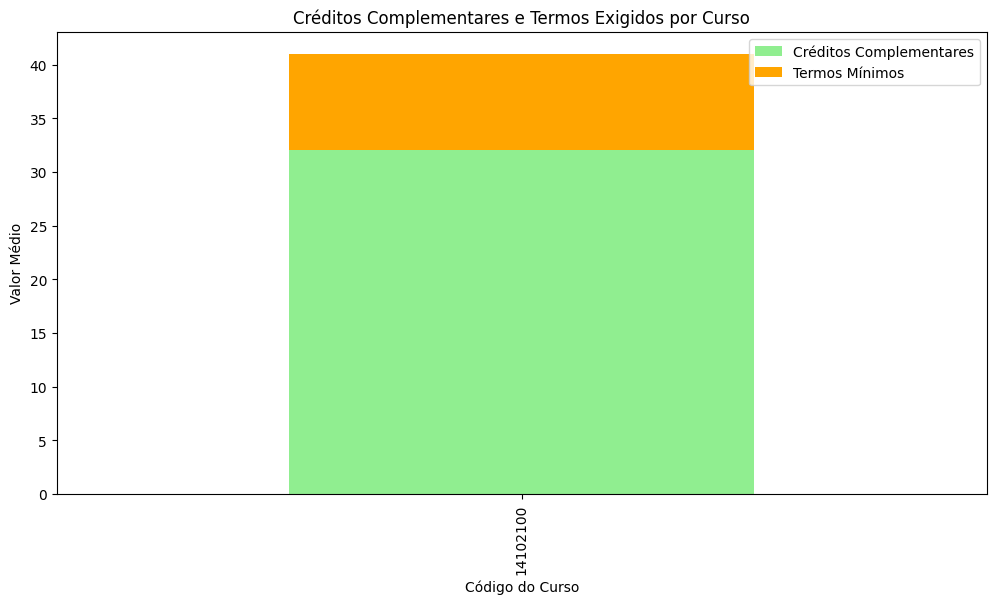

In [14]:
# Gráfico de barras empilhadas para créditos complementares e termos exigidos
df_atividades_complementares = curriculum.groupby('CODIGO_CURSO')[['MINIMO_CREDITOS_COMPLEMENTARES_NECESSARIOS', 'TERMO_NUMERO_MINIMO']].mean()

# Plotando barras empilhadas
df_atividades_complementares.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightgreen', 'orange'])
plt.title('Créditos Complementares e Termos Exigidos por Curso')
plt.xlabel('Código do Curso')
plt.ylabel('Valor Médio')
plt.xticks(rotation=90)
plt.legend(['Créditos Complementares', 'Termos Mínimos'])
plt.show()

### Barras Empilhadas com Valores Dentro

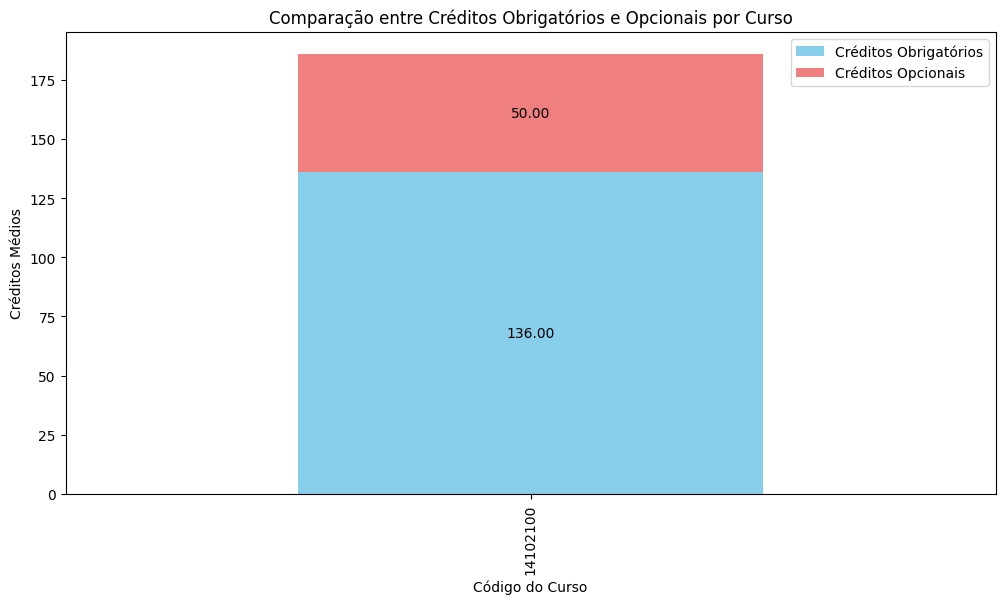

In [16]:
# Gráfico de barras empilhadas comparando créditos obrigatórios e opcionais
import pandas as pd
import matplotlib.pyplot as plt

# Criar um DataFrame com os créditos obrigatórios e opcionais por curso
df_comparacao = curriculum.groupby('CODIGO_CURSO')[['MINIMO_CREDITO_OBRIGATORIOS_NECESSARIO', 'MINIMO_CREDITO_OPCIONAIS_NECESSARIOS']].mean()

# Plotando barras empilhadas
ax = df_comparacao.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'lightcoral'])

# Adicionando os valores dentro das barras
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax.text(x, y, f'{height:.2f}', ha='center', va='center', color='black')

# Título, rótulos e ajustes
plt.title('Comparação entre Créditos Obrigatórios e Opcionais por Curso')
plt.xlabel('Código do Curso')
plt.ylabel('Créditos Médios')
plt.xticks(rotation=90)
plt.legend(['Créditos Obrigatórios', 'Créditos Opcionais'])
plt.show()